In [1]:
import sys
sys.path.insert(0, "..")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IA.utils import mapping, parameter_range
from scipy import stats
import math
plt.style.reload_library()
plt.style.use(['science'])

In [2]:
!ls -lah analysis/not_uploaded/IA/ | grep regress

-rw-r--r-- 1 janpf janpf 902M Nov  6 21:07 .scratch.ckpts.IA.pexels.scores-None.change_regress.epoch-8.pth.txt
-rw-r--r-- 1 janpf janpf 952M Nov  6 21:07 .scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-17.pth.txt
-rw-r--r-- 1 janpf janpf 936M Nov  6 21:07 .scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-5.pth.txt
-rw-r--r-- 1 janpf janpf 935M Nov  6 21:07 .scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-9.pth.txt


In [2]:
df = pd.read_csv("analysis/not_uploaded/IA/.scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-17.pth.txt")
#df = pd.read_csv("../analysis/not_uploaded/IA/.scratch.ckpts.IA.pexels.scores-None.change_regress.epoch-8.pth.txt")

#for col in df.columns:
#    if not "score" in col:
#        continue
#    try:
#        df[col] = df[col].apply(lambda row: row[0])
#    except:
#        pass
print(df.columns)
df

Index(['img', 'distortion', 'level', 'score', 'styles_contrast_strength',
       'styles_brightness_strength', 'styles_saturation_strength',
       'styles_shadows_strength', 'styles_highlights_strength',
       'styles_exposure_strength', 'styles_vibrance_strength',
       'styles_temperature_strength', 'styles_tint_strength',
       'technical_jpeg_compression_strength',
       'technical_defocus_blur_strength', 'technical_motion_blur_strength',
       'technical_pixelate_strength', 'technical_gaussian_noise_strength',
       'technical_impulse_noise_strength', 'composition_rotate_strength',
       'composition_hcrop_strength', 'composition_vcrop_strength',
       'composition_leftcornerscrop_strength',
       'composition_rightcornerscrop_strength', 'composition_ratio_strength'],
      dtype='object')


,img,distortion,level,score,styles_contrast_strength,styles_brightness_strength,styles_saturation_strength,styles_shadows_strength,styles_highlights_strength,styles_exposure_strength,...,technical_motion_blur_strength,technical_pixelate_strength,technical_gaussian_noise_strength,technical_impulse_noise_strength,composition_rotate_strength,composition_hcrop_strength,composition_vcrop_strength,composition_leftcornerscrop_strength,composition_rightcornerscrop_strength,composition_ratio_strength
0,5/3/c/abbey-glass-religion-architecture-106158...,original,0.0,0.388916,0.289795,0.088135,0.161499,-0.131714,0.388672,0.224365,...,0.373535,0.604492,0.399902,0.358643,-0.019821,0.125244,-0.499023,-0.512695,-0.503418,0.072205
1,9/4/4/abraham-lincoln-lincoln-memorial-washing...,original,0.0,0.573242,-0.060394,0.105408,0.108032,0.030380,0.362549,-0.027405,...,0.089600,0.325684,0.193115,0.188354,0.190063,0.002869,-0.214844,-0.210449,-0.223999,0.368164
2,a/5/9/abstract-background-backgrounds-botany-8...,original,0.0,0.922852,0.558105,-0.355957,1.207031,0.349854,-0.147217,0.304443,...,-0.232666,-0.355469,-0.431641,-0.431641,0.023483,-0.011826,-0.236206,-0.231567,-0.158081,0.476074
3,2/2/c/adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,0.496094,0.464844,-0.587891,0.747559,-0.311523,-0.006744,-0.035248,...,0.130737,0.090881,0.235596,0.219482,0.068665,0.148315,-0.222534,-0.211060,-0.227661,0.430420
4,a/0/7/adult-cute-face-female-41522.jpeg,original,0.0,0.771484,-0.078918,0.376221,-0.062103,0.101379,0.680176,-0.004498,...,0.175415,0.239990,0.036560,0.050842,0.154663,0.160645,0.041260,0.027328,0.056396,0.114746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609995,0/d/b/wood-painting-window-cactus-6689.jpg,ratio,5.0,0.679199,0.098999,-0.143799,0.137939,-0.171265,0.080200,-0.209961,...,0.214111,0.338867,0.080139,0.059723,0.110413,0.245361,-0.534668,-0.551270,-0.560059,0.233154
2609996,0/1/0/wood-sky-forest-autumn.jpg,ratio,5.0,0.230713,0.433350,-0.487305,0.678223,-0.489746,0.351074,0.076111,...,0.333740,0.398193,0.299561,0.259766,0.020065,0.101013,-0.453369,-0.430908,-0.427490,0.356689
2609997,0/d/2/wood-stool-wooden-wine.jpg,ratio,5.0,0.647949,-0.011581,0.354248,0.149292,0.367188,0.332275,0.277344,...,0.254150,0.288086,0.150146,0.149414,-0.007713,0.362549,-0.129761,-0.148926,-0.148438,0.717773
2609998,b/5/e/wood-tree-brown-bark.jpg,ratio,5.0,0.057922,0.097473,-0.231079,-0.369629,0.010521,0.277344,-0.361328,...,0.503906,0.658203,0.460693,0.431641,0.200928,0.102722,-0.366211,-0.387207,-0.323486,0.712402


In [6]:
ren = dict()
ren["level"] = "intensity"
for col in df.columns:
    if "_" in col:
        new = col.split("_")
        new = new[1] + " " + new[2]
        ren[col] = new.replace("strength", "predicted")
df.rename(columns=ren, inplace=True)
df

,img,distortion,intensity,score,contrast predicted,brightness predicted,saturation predicted,shadows predicted,highlights predicted,exposure predicted,...,motion blur,pixelate predicted,gaussian noise,impulse noise,rotate predicted,hcrop predicted,vcrop predicted,leftcornerscrop predicted,rightcornerscrop predicted,ratio predicted
0,5/3/c/abbey-glass-religion-architecture-106158...,original,0.0,0.388916,0.289795,0.088135,0.161499,-0.131714,0.388672,0.224365,...,0.373535,0.604492,0.399902,0.358643,-0.019821,0.125244,-0.499023,-0.512695,-0.503418,0.072205
1,9/4/4/abraham-lincoln-lincoln-memorial-washing...,original,0.0,0.573242,-0.060394,0.105408,0.108032,0.030380,0.362549,-0.027405,...,0.089600,0.325684,0.193115,0.188354,0.190063,0.002869,-0.214844,-0.210449,-0.223999,0.368164
2,a/5/9/abstract-background-backgrounds-botany-8...,original,0.0,0.922852,0.558105,-0.355957,1.207031,0.349854,-0.147217,0.304443,...,-0.232666,-0.355469,-0.431641,-0.431641,0.023483,-0.011826,-0.236206,-0.231567,-0.158081,0.476074
3,2/2/c/adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,0.496094,0.464844,-0.587891,0.747559,-0.311523,-0.006744,-0.035248,...,0.130737,0.090881,0.235596,0.219482,0.068665,0.148315,-0.222534,-0.211060,-0.227661,0.430420
4,a/0/7/adult-cute-face-female-41522.jpeg,original,0.0,0.771484,-0.078918,0.376221,-0.062103,0.101379,0.680176,-0.004498,...,0.175415,0.239990,0.036560,0.050842,0.154663,0.160645,0.041260,0.027328,0.056396,0.114746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609995,0/d/b/wood-painting-window-cactus-6689.jpg,ratio,5.0,0.679199,0.098999,-0.143799,0.137939,-0.171265,0.080200,-0.209961,...,0.214111,0.338867,0.080139,0.059723,0.110413,0.245361,-0.534668,-0.551270,-0.560059,0.233154
2609996,0/1/0/wood-sky-forest-autumn.jpg,ratio,5.0,0.230713,0.433350,-0.487305,0.678223,-0.489746,0.351074,0.076111,...,0.333740,0.398193,0.299561,0.259766,0.020065,0.101013,-0.453369,-0.430908,-0.427490,0.356689
2609997,0/d/2/wood-stool-wooden-wine.jpg,ratio,5.0,0.647949,-0.011581,0.354248,0.149292,0.367188,0.332275,0.277344,...,0.254150,0.288086,0.150146,0.149414,-0.007713,0.362549,-0.129761,-0.148926,-0.148438,0.717773
2609998,b/5/e/wood-tree-brown-bark.jpg,ratio,5.0,0.057922,0.097473,-0.231079,-0.369629,0.010521,0.277344,-0.361328,...,0.503906,0.658203,0.460693,0.431641,0.200928,0.102722,-0.366211,-0.387207,-0.323486,0.712402


In [9]:
def violin_distortion(distortion:str, change:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == "original")]
    if distortion in parameter_range:
        plot_frame.loc[plot_frame["distortion"] == "original", "intensity"] = parameter_range[distortion]["default"]
    sns.violinplot(data=plot_frame, x="intensity", y=change, color="steelblue")
    plt.ylim(-1, 1)

In [10]:
parameter_range.keys()

dict_keys(['contrast', 'brightness', 'saturation', 'shadows', 'highlights', 'exposure', 'vibrance', 'temperature', 'tint', 'lcontrast'])

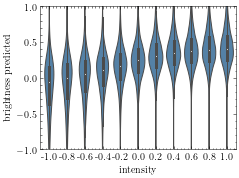

In [15]:
violin_distortion("brightness", f"brightness predicted")
plt.savefig("analysis/IA/regr_brightness.pdf")

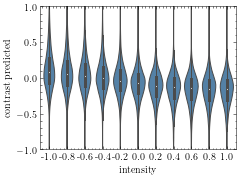

In [16]:
violin_distortion("brightness", f"contrast predicted")
plt.savefig("analysis/IA/regr_brightness_contrast.pdf")

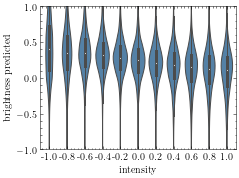

In [17]:
violin_distortion("contrast", f"brightness predicted")
plt.savefig("analysis/IA/regr_contrast_brightness.pdf")

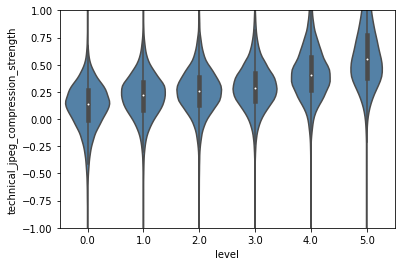

In [58]:
dist = "jpeg_compression"
violin_distortion(dist, f"technical_{dist}_strength")

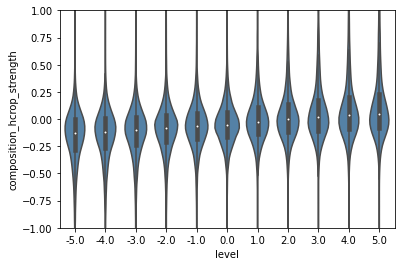

In [59]:
dist = "hcrop"
violin_distortion(dist, f"composition_{dist}_strength")

In [60]:
def violin_original():
    plot_frame = df[df["distortion"] == "original"]
    plot_frame = plot_frame[[col for col in df.columns if "strength" in col]]
    sns.violinplot(data=plot_frame, color="steelblue")
    plt.ylim(-1, 1)
    plt.gcf().set_size_inches(20,10)
    plt.xticks(rotation=90)
    plt.hlines(0, 0, len(plot_frame.columns)-1)

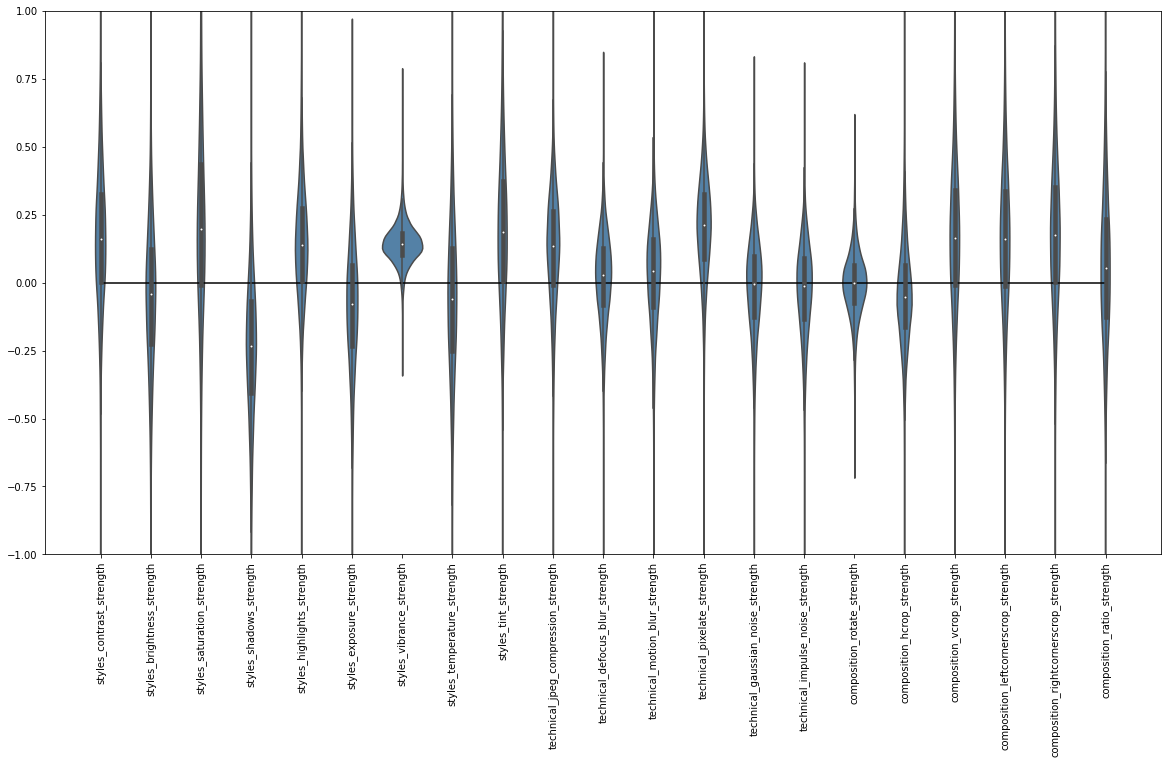

In [61]:
violin_original()